# BASELINE MODEL

Using [this webpage](https://medium.com/@pallawi.ds/ai-starter-train-and-test-your-first-neural-network-classifier-in-keras-from-scratch-b6a5f3b3ebc4) to help me out

# import statements

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import numpy as np
import random

# import keras
import keras
from keras.models import Sequential
from keras import backend as K
backend_keras = keras.backend.backend()
print("keras is using", backend_keras,"as the backend")
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


keras is using tensorflow as the backend


# Load the data

In [2]:
images = np.load("training_set.npy")
labels_all = np.load("training_redshift_labels.npy")
print(images.shape)
print(labels_all.shape)

images = list(images)
labels_all = list(labels_all)

(6171, 50, 50)
(6171,)


# Preprocessing

In [3]:
# Shuffle the data
shuffled_images = []
shuffled_labels_all = []
while images:
    i = random.randrange(len(images))
    shuffled_images.append(images[i])
    del images[i]
    shuffled_labels_all.append(labels_all[i])
    del labels_all[i]
    
images = np.array(shuffled_images[:])
labels_all = np.array(shuffled_labels_all)

In [4]:
print(images.shape)
print(labels_all.shape)

(6171, 50, 50)
(6171,)


### make the labels so that the model can learn them
Sofar the labels are floats 

In [5]:
# display the labels
l = []
for i in labels_all:
    if i not in l: l.append(i)
l.sort()
print(l,"\nThere are",len(l),"labels. So the the problem is an image classification into",len(l),"classes")

[5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0] 
There are 17 labels. So the the problem is an image classification into 17 classes


In [6]:
# define the train labels in len 17 arrays
labels = []
for i in labels_all:
    arr = np.zeros(17)
    index = int(np.round((i-5)*2,0))
    arr[index]=1
    labels.append(arr[:])
    
labels = np.array(labels)
print("train_labels shape =", labels.shape,"\nFirst 3 entries:")
print(labels[:3])

train_labels shape = (6171, 17) 
First 3 entries:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### normalise the images
because the values of the pixels in these images are somewhat unconventional I normalize by dividing by 70 instead of 255, this is because I checked and the max value was 66 point something.

In [7]:
# normalize images
images_n = images / 70.0 # n for normalized
print("max : ",np.max(images_n))
print("min : ",np.min(images_n))

max :  0.9500968
min :  0.0


Flatten the images for training

In [8]:
images_flatten = np.array([i.flatten("C") for i in images_n])
print("triain images flatten shape : ",images_flatten.shape)

triain images flatten shape :  (6171, 2500)


# Train Test Split

In [9]:
ratio = 0.9
cut = int(len(images_flatten)*ratio)
images_train = images_flatten[:cut]
labels_train = labels[:cut]
images_test = images_flatten[cut:]
labels_test = labels[cut:]

# Define Architecture
The input size is 2500 and the output is gonna have size 17. I'm gonna make it single hidden layer.

In [10]:
model = Sequential()

model.add(Dense(350, input_shape=(2500,), activation="sigmoid"))
model.add(Dense(17, activation="softmax"))

print("printing summary of model")
model.summary()

printing summary of model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 350)               875350    
_________________________________________________________________
dense_2 (Dense)              (None, 17)                5967      
Total params: 881,317
Trainable params: 881,317
Non-trainable params: 0
_________________________________________________________________


# Compile the mode
You can compile a network (model) as many times as you want. You need to compile the model if you wish to change the loss function, optimizer or matrices.

You need a compiled model to train (because training uses the loss function and the optimizer). But it’s not necessary to compile the model when testing the model on a new data.

In [11]:
# Initialize the initial learning rate and number of Epochs
INIT_LR = 0.01
EPOCHS = 250

# compile the model using SGD optimizer (see imports) and categorical cross-entropy loss
print("[INFO] Compiled the network...")
opt = SGD(lr = INIT_LR) # stochastic gradient descent
model.compile(loss="categorical_crossentropy", optimizer=opt,
             metrics=["accuracy"])

[INFO] Compiled the network...


In [12]:
# split the train into a train and valid set to feed into the model
ratio = 0.8
cut = int(ratio*len(images_train))
trainX = images_train[:cut]
trainY = labels_train[:cut]
valX = images_train[cut:]
valY = labels_train[cut:]

## OR possible import an old network / pre-defined network for (re)training

# Train the network

In [13]:
print("a random guess would have probability",100./17)

a random guess would have probability 5.882352941176471


In [14]:
H = model.fit(trainX, trainY,
             validation_data=(valX,valY),
             epochs=EPOCHS, batch_size=32)

Train on 4442 samples, validate on 1111 samples
Epoch 1/250
4442/4442 [==============================] - 3s 609us/step - loss: 2.6814 - accuracy: 0.1222 - val_loss: 2.5470 - val_accuracy: 0.1575
Epoch 2/250
4442/4442 [==============================] - 3s 599us/step - loss: 2.4700 - accuracy: 0.1587 - val_loss: 2.4095 - val_accuracy: 0.1314
Epoch 3/250
4442/4442 [==============================] - 3s 606us/step - loss: 2.3631 - accuracy: 0.1812 - val_loss: 2.3149 - val_accuracy: 0.2106
Epoch 4/250
4442/4442 [==============================] - 2s 509us/step - loss: 2.2873 - accuracy: 0.2123 - val_loss: 2.2620 - val_accuracy: 0.2430
Epoch 5/250
4442/4442 [==============================] - 3s 574us/step - loss: 2.2333 - accuracy: 0.2285 - val_loss: 2.2092 - val_accuracy: 0.2178
Epoch 6/250
4442/4442 [==============================] - 2s 506us/step - loss: 2.1903 - accuracy: 0.2490 - val_loss: 2.1711 - val_accuracy: 0.1899
Epoch 7/250
4442/4442 [==============================] - 3s 605us/step

KeyboardInterrupt: 

## Evaluate the netork

In [20]:
print("[INFO] evaluating netowrk...")
predictions = model.predict(images_test, batch_size=32)
correct, incorrect = 0,0
if len(predictions)!=len(labels_test): raise Exception
for i in range(len(predictions)):
    if list(predictions[i]).index(max(predictions[i])) == list(labels_test[i]).index(1): 
        correct +=1
    else: 
        incorrect +=1
    
print("The test data set accuracy is", 100*(correct / (correct+incorrect)))

[INFO] evaluating netowrk...
The test data set accuracy is 47.73462783171521


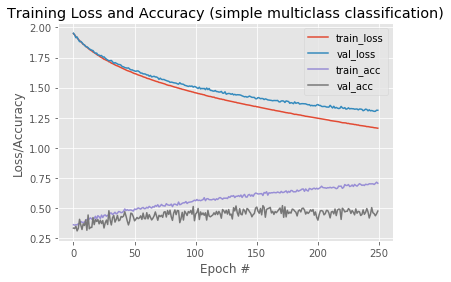

In [21]:
# plot the training loss and accuracy for each epoch
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple multiclass classification)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")
plt.show()

### Save the weights

In [22]:
# save the model to the disk
print("[INFO] serializing network...")
model.save("keras_single_hidden_layer_2500_350_17_acc_48.model")

[INFO] serializing network...


# OR Import an old neural network